In [226]:
import numpy as np
import pandas as pd
import json
import dateutil.parser
import random
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [227]:
##loading book review data
book_review = []
with open('fantasy_10000.json') as f:
    for line in f:
        book_review.append(json.loads(line))
book_review = pd.DataFrame(book_review)
book_review['review_len'] = book_review['review_text'].str.len()


In [136]:
##Q2 Train a simple predictor that estimates rating from review length,
X = np.array(book_review['review_len'].to_list())
Y = np.array(pd.to_numeric(book_review['rating']).to_list())
A = np.vstack([X, np.ones(len(X))]).T
theta,residuals,rank,s = numpy.linalg.lstsq(A, Y)
print("theta 0 = " + str(theta[1]) + " theta 1 = " + str(theta[0]))

Y_trained = theta[0] * X + theta[1]
mse = ((Y - Y_trained)**2).mean()
print("MSE = " + str(mse))

theta 0 = 3.6856813550169507 theta 1 = 6.873716748962792e-05
MSE = 1.5522086622355378


In [139]:
##Q3 Extend your model to include (in addition to the length) features based on the time of the review


time = book_review['date_added'].str.split(" ",expand = True)
year = np.array(pd.to_numeric(time[5]))
weekday = np.array(time[0])

weekday_dict = {'Mon':1, 'Tue':2, 'Wed':3, 'Thu':4, 'Fri':5, 'Sat':6, 'Sun':7}
weekday = [weekday_dict[day] for day in weekday]
weekday = np.array(weekday)
weekday_onehot = np.zeros((weekday.size, weekday.max()))
weekday_onehot[np.arange(weekday.size),weekday-1] = 1

year_onehot = np.zeros((year.size, 12))
year_onehot[np.arange(year.size),year-2006] = 1

year_weekday_onehot = np.hstack([weekday_onehot,year_onehot])

A_2 = np.vstack([X,year_weekday_onehot.T]).T
A_2 = np.vstack([np.ones(len(X)),A_2.T]).T

## on-hot vector for first example Sun Jul 30 07:44:10 -0700 2017. Monday as the first day and 2006 as the first year

print("Feature vector for first sample:")
print(A_2[0])

## on-hot vector for second example Wed Sep 24 09:29:29 -0700 2014
print("Feature vector for second sample:")
print(A_2[1])




Feature vector for first sample:
[1.000e+00 2.086e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00]
Feature vector for second sample:
[1.000e+00 1.521e+03 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00]


In [140]:
##Q4 use the weekday and year values directly as features

X = np.array(book_review['review_len'].to_list())
Y = np.array(pd.to_numeric(book_review['rating']).to_list())
A = np.vstack([X,year])
A = np.vstack([A,np.array(weekday)])
A = np.vstack([A, np.ones(len(X))]).T

theta,residuals,rank,s = numpy.linalg.lstsq(A, Y)
#print(theta)

Y_trained = theta[0] * X + theta[1] * year + theta[2] * np.array(weekday) + theta[3]
mse = ((Y - Y_trained)**2).mean()
print("MSE for direct features = " + str(mse))


##Q4 use the one-hot encoding from 
A_2 = np.vstack([X,year_weekday_onehot.T]).T
A_2 = np.vstack([np.ones(len(X)),A_2.T]).T

theta_,residuals_,rank_,s_ = numpy.linalg.lstsq(A_2, Y)
#print(theta_)

Y_trained_ =  A_2.dot(theta_)

mse_ = ((Y - Y_trained_)**2).mean()
print("MSE for one-hot features = " + str(mse_))

MSE for direct features = 1.5367740498705236
MSE for one-hot features = 1.5123578656428203


In [142]:
##Q6 part 1.
data = np.vstack([A.T,Y]).T
indices = [i for i in range(0,len(Y))]
random.shuffle(indices)
test_indices = indices[0:int(len(Y)/2)]
train_indices = indices[int(len(Y)/2):]

train_data = data[train_indices]
test_data = data[test_indices]


theta,residuals,rank,s = numpy.linalg.lstsq(train_data[:,[0,1,2,3]], train_data[:,4])
#print(theta)

Y_train = theta[0] * train_data[:,0] + theta[1] * train_data[:,1] + theta[2] * train_data[:,2] + theta[3]
mse_train = ((train_data[:,4] - Y_train)**2).mean()
print("MSE on train data for direct features = " + str(mse_train))

Y_test = theta[0] * test_data[:,0] + theta[1] * test_data[:,1] + theta[2] * test_data[:,2] + theta[3]
mse_test = ((test_data[:,4] - Y_test)**2).mean()
print("MSE on test data for direct features = " + str(mse_test))



##Q6 part 2.

data_2 = np.vstack([A_2.T,Y]).T
indices = [i for i in range(0,len(Y))]
random.shuffle(indices)
test_indices = indices[0:int(len(Y)/2)]
train_indices = indices[int(len(Y)/2):]

train_data = data_2[train_indices]
test_data = data_2[test_indices]

theta,residuals,rank,s = numpy.linalg.lstsq(train_data[:,0:21], train_data[:,21])
#print(theta)

Y_train = train_data[:,0:21].dot(theta)
mse_train = ((train_data[:,21] - Y_train)**2).mean()
print("MSE on train data for one-hot features = " + str(mse_train))

Y_test = test_data[:,0:21].dot(theta)
mse_test = ((test_data[:,21] - Y_test)**2).mean()
print("MSE on test data for one-hot features = " + str(mse_test))








MSE on train data for direct features = 1.5055003684666903
MSE on test data for direct features = 1.5691974829672797
MSE on train data for one-hot features = 1.4753003933065094
MSE on test data for one-hot features = 1.5534598885483288


In [228]:
##loading beer review data

beer_review = []
with open('beer_50000.json') as f:
    for line in f:
        beer_review.append(eval(line))
beer_review = pd.DataFrame(beer_review)


In [224]:
##Q7 classification
Y = np.array(beer_review['review/overall'])
X = np.array(beer_review['review/text'].str.len())
X = X.reshape(-1, 1)
binarized_score = np.array([i>=4 for i in Y])

model = LogisticRegression(class_weight='balanced')
model.fit(X, binarized_score)
predicted = model.predict(X)
cm=confusion_matrix(binarized_score, predicted)
TP = cm[1,1]
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]
print("TN = ", str(TN))
print("FP = ", str(FP))
print("FN = ", str(FN))
print("TP = ", str(TP))
print("BER = ", str(1 - 0.5*(TP/(TP+FN) + TN/(TN+FP))))

TN =  10503
FP =  5885
FN =  19411
TP =  14201
BER =  0.4683031525957275


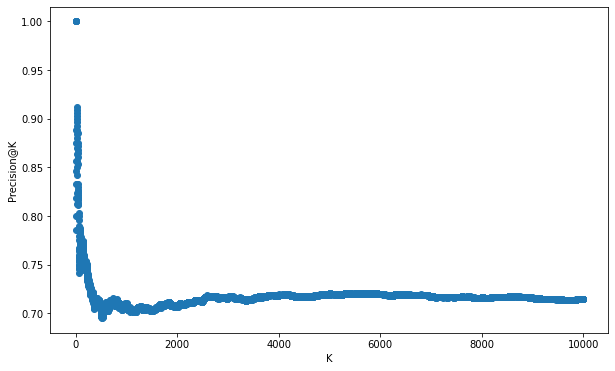

In [225]:
##Q8 reporting precision@K

probabilites = model.predict_proba(X)
both_Y = np.vstack([probabilites.T,Y]).T
both_Y_sorted = both_Y[both_Y[:, 1].argsort()][::-1]
#print(both_Y_sorted[10000])

relevant = 0
recommended = 0
precision_k = [0 for i in range(10000)]
for i in range(0,10000):
    recommended += 1
    if both_Y_sorted[i,2] >= 4:
        relevant += 1
    precision_k[i] = relevant/recommended
#print(precision_k[0:20])

plt.figure(figsize = (10,6))
plt.scatter([i for i in range(10000)], precision_k)
plt.xlabel("K")
plt.ylabel("Precision@K")
plt.show()
    
    

Precision@K for K = 1:  1.0
Precision@K for K = 100:  0.75
Precision@K for K = 10000:  0.6195


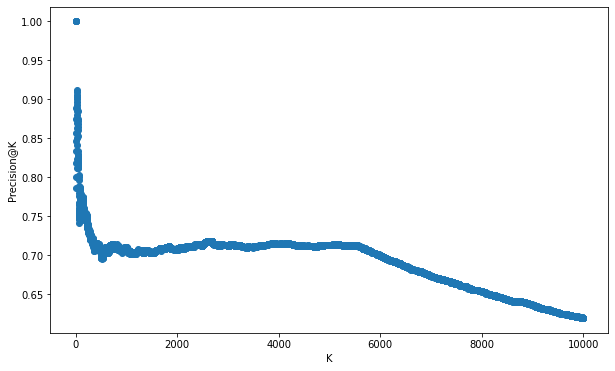

In [221]:
##Q9 precision@K considering negative
both_Y = np.vstack([probabilites.T,Y]).T
both_Y[:,1] = abs(both_Y[:,1] - 0.5)
both_Y_sorted = both_Y[both_Y[:, 1].argsort()][::-1]
#print(both_Y_sorted)

relevant = 0
recommended = 0
precision_k = [0 for i in range(10000)]
for i in range(0,10000):
    recommended += 1
    if both_Y_sorted[i,0] > 0.5 and both_Y_sorted[i,2] < 4:
        relevant += 1
    if both_Y_sorted[i,0] < 0.5 and both_Y_sorted[i,2] >= 4:
        relevant += 1
    precision_k[i] = relevant/recommended
    
print("Precision@K for K = 1: ", str(precision_k[0]))
print("Precision@K for K = 100: ", str(precision_k[99]))
print("Precision@K for K = 10000: ", str(precision_k[9999]))

plt.figure(figsize = (10,6))
plt.scatter([i for i in range(10000)], precision_k)
plt.xlabel("K")
plt.ylabel("Precision@K")
plt.show()
